In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from rdkit import Chem
from rdkit import DataStructs
from rdkit.Chem import Draw
from rdkit.Chem import MACCSkeys
%matplotlib inline

In [3]:
data = pd.read_csv('ML_Data.csv')

In [4]:
data.bioactivity_class.unique()

array(['inactive', 'active'], dtype=object)

In [5]:
data.head()

,molecule_chembl_id,0,1,2,3,4,5,6,7,8,...,2039,2040,2041,2042,2043,2044,2045,2046,2047,bioactivity_class
0,CHEMBL3326305,0,1,1,1,0,1,0,1,0,...,0,0,0,1,0,0,0,0,1,inactive
1,CHEMBL3326305,0,1,1,1,0,1,0,1,0,...,0,0,0,1,0,0,0,0,1,inactive
2,CHEMBL3326305,0,1,1,1,0,1,0,1,0,...,0,0,0,1,0,0,0,0,1,inactive
3,CHEMBL3326305,0,1,1,1,0,1,0,1,0,...,0,0,0,1,0,0,0,0,1,inactive
4,CHEMBL3326315,0,0,1,1,0,1,1,1,0,...,0,1,0,1,0,1,0,0,1,inactive


In [6]:
X = data.drop(['molecule_chembl_id', 'bioactivity_class'], axis = 1)

In [7]:
X.head()

,0,1,2,3,4,5,6,7,8,9,...,2038,2039,2040,2041,2042,2043,2044,2045,2046,2047
0,0,1,1,1,0,1,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1
1,0,1,1,1,0,1,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0,1,1,1,0,1,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1
3,0,1,1,1,0,1,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1
4,0,0,1,1,0,1,1,1,0,0,...,0,0,1,0,1,0,1,0,0,1


In [8]:
y = data.bioactivity_class

In [9]:
y.head()

0    inactive
1    inactive
2    inactive
3    inactive
4    inactive
Name: bioactivity_class, dtype: object

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33)

In [11]:
clf = RandomForestClassifier(n_estimators=100)

In [12]:
clf.fit(X_train, y_train,)

RandomForestClassifier()

In [13]:
clf.score(X_test, y_test)

0.9705882352941176

In [14]:
y_pred = clf.predict(X_test)

In [15]:
y_np_test = y_test.to_numpy()

In [16]:
y_np_test

array(['inactive', 'active', 'active', 'inactive', 'inactive', 'active',
       'inactive', 'inactive', 'active', 'active', 'active', 'inactive',
       'active', 'inactive', 'active', 'inactive', 'active', 'active',
       'active', 'active', 'inactive', 'active', 'active', 'inactive',
       'active', 'active', 'inactive', 'active', 'active', 'active',
       'active', 'active', 'active', 'inactive', 'inactive', 'active',
       'inactive', 'inactive', 'inactive', 'active', 'inactive',
       'inactive', 'inactive', 'active', 'active', 'inactive', 'active',
       'active', 'active', 'active', 'active', 'active', 'active',
       'inactive', 'active', 'inactive', 'inactive', 'active', 'inactive',
       'inactive', 'active', 'active', 'active', 'inactive', 'active',
       'inactive', 'active', 'active', 'active', 'inactive', 'inactive',
       'inactive', 'inactive', 'active', 'inactive', 'active', 'active',
       'active', 'active', 'active', 'inactive', 'inactive', 'active',
    

In [17]:
conf_mat = confusion_matrix(y_np_test, y_pred)

In [18]:
conf_mat

array([[81,  2],
       [ 2, 51]], dtype=int64)

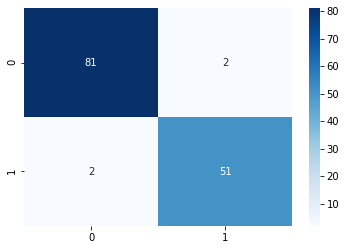

In [19]:
sns.heatmap(conf_mat, annot=True, cmap="Blues")

### Проверка модели на новых данных

In [20]:
new_data = pd.read_csv('substances.csv')


In [21]:
new_data.head()

,zinc_id,smiles
0,ZINC000064559000,CCN1CCN(Cc2ccc(C#C[C@]3(CN4Cc5ccc(OC)cc5C4=O)N...
1,ZINC000064559336,CCN1CCN(/C(=N\O)c2ccc(C#C[C@]3(CN4Cc5ccc(OC)cc...
2,ZINC000096173745,COc1ccc2c(c1)C(=O)N(C[C@@]1(C#Cc3ccc(/C(=N/O)N...
3,ZINC000096173748,CCCCN1CCN(/C(=N\O)c2ccc(C#C[C@]3(CN4Cc5ccc(OC)...
4,ZINC000096173749,COc1ccc2c(c1)C(=O)N(C[C@@]1(C#Cc3ccc(/C(=N/O)N...


In [22]:
mol_list = new_data['smiles'].tolist()

In [39]:
mol = []
for m in mol_list:
    molec = Chem.MolFromSmiles(m)
    mol.append(molec)

fps = []
for m in mol:
    fp = Chem.RDKFingerprint(m)
    fps.append(fp)

fps_to_bit = []
for f in fps:
    fb = f.ToBitString()
    fps_to_bit.append(fb)

fps_to_list = []
for b in fps_to_bit:
    a = list(b)
    fps_to_list.append(a)

mol_id_list = new_data.zinc_id.tolist()

In [40]:
new_data_2 = pd.DataFrame(np.array(fps_to_list).transpose(), columns=[mol_id_list])

In [41]:
new_data_2

,ZINC000064559000,ZINC000064559336,ZINC000096173745,ZINC000096173748,ZINC000096173749,ZINC000096173750,ZINC000096173754,ZINC000096173755,ZINC000100628892,ZINC000143245662,...,ZINC000169694508,ZINC000169694515,ZINC000169694516,ZINC000169694523,ZINC000169694524,ZINC000169694529,ZINC000169694530,ZINC000169694531,ZINC000169694532,ZINC000261146834
0,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
1,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
2,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
3,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
4,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2043,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
2044,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2045,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2046,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [30]:
chembl_with_bit = new_data_2.transpose()

In [31]:
chembl_with_bit = chembl_with_bit.reset_index()

In [32]:
chembl_with_bit=chembl_with_bit.rename(columns={'level_0':'zinc_id'})

In [35]:
chembl_with_bit.head()

,zinc_id,0,1,2,3,4,5,6,7,8,...,2038,2039,2040,2041,2042,2043,2044,2045,2046,2047
0,ZINC000064559000,1,1,1,1,1,1,0,0,1,...,0,1,0,1,1,1,0,0,1,1
1,ZINC000064559336,1,1,1,1,1,1,0,0,1,...,0,1,0,1,1,1,0,0,1,1
2,ZINC000096173745,1,1,1,1,1,1,0,0,1,...,0,1,0,1,1,1,0,0,1,1
3,ZINC000096173748,1,1,1,1,1,1,0,0,1,...,0,1,0,1,1,1,0,0,1,1
4,ZINC000096173749,1,1,1,1,1,1,0,0,1,...,0,1,0,1,1,1,0,0,1,1


In [36]:
X_new = chembl_with_bit.drop('zinc_id',axis = 1)

In [37]:
C

,0,1,2,3,4,5,6,7,8,9,...,2038,2039,2040,2041,2042,2043,2044,2045,2046,2047
0,1,1,1,1,1,1,0,0,1,1,...,0,1,0,1,1,1,0,0,1,1
1,1,1,1,1,1,1,0,0,1,1,...,0,1,0,1,1,1,0,0,1,1
2,1,1,1,1,1,1,0,0,1,1,...,0,1,0,1,1,1,0,0,1,1
3,1,1,1,1,1,1,0,0,1,1,...,0,1,0,1,1,1,0,0,1,1
4,1,1,1,1,1,1,0,0,1,1,...,0,1,0,1,1,1,0,0,1,1


In [38]:
clf.predict(X_new)

array(['active', 'active', 'active', 'active', 'active', 'active',
       'active', 'active', 'active', 'active', 'active', 'active',
       'active', 'inactive', 'active', 'active', 'active', 'active',
       'active', 'active', 'active', 'active', 'active', 'active',
       'active', 'active', 'active', 'active', 'active'], dtype=object)